In [1]:
import pandas

In [2]:
reddit_survey = pandas.read_csv("RedditShortDemoSurvey-1-Cleaned.csv")

In [5]:
reddit_survey

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,(For U. S. redditors) In which state do you live?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Male,25-34,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Male,25-34,In a relationship,Employed full time,No,No,Some college,Germany,NaN,none,python,I like dogs.,Cheddar,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Male,18-24,Married/civil union/domestic partnership,"Not employed, but looking for work",No,No,Bachelor's degree,United States,California,"$70,000 - $99,999",fffffffuuuuuuuuuuuu,I like dogs.,American,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Male,35-44,Married/civil union/domestic partnership,Employed full time,No,No,Bachelor's degree,United States,New York,"$150,000 or more",todayilearned,I like cats.,Provolone,NaN,NaN,NaN,NaN,NaN,NaN
9,10,Male,25-34,In a relationship,Freelance,No,No,Some college,Germany,NaN,"$70,000 - $99,999",NaN,I like cats.,Munster,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
reddit_survey.describe()

,Entry Id
count,32754.000000
mean,16378.561916
std,9456.272427
min,1.000000
25%,8189.250000
50%,16379.500000
75%,24567.750000
max,32756.000000


In [4]:
reddit_survey.shape

(32754, 20)

### Cleaning Survey Data (deleting unnecesary columns)

"Entry Id", "US States" and "Unnamed" columns will be deleted because there are not needed

In [6]:
reddit_survey.drop(["Entry Id", "(For U. S. redditors) In which state do you live?", 
             "Unnamed: 14", "Unnamed: 15", "Unnamed: 16", "Unnamed: 17", "Unnamed: 18", "Unnamed: 19"], axis=1, inplace=True)

### Countries to their Continent

In [7]:
import geonamescache
continents = geonamescache.GeonamesCache().get_countries_by_names()

In [8]:
reddit_survey["Continent"] = reddit_survey["Treated country data"].apply(
    lambda country_name: continents[country_name]["continentcode"] if (country_name in continents) else "NoC")

Now we find how many entries that have no continent?

In [9]:
sum(reddit_survey["Continent"] == "NoC")

1350

Those will be deleted

In [10]:
reddit_survey = reddit_survey[reddit_survey["Continent"] != "NoC"]

In [11]:
reddit_survey.drop(["Treated country data"], axis=1, inplace=True)

### Handling Missing Data

First, we'll replace 'none' values with NaN

In [12]:
import numpy as np
reddit_survey = reddit_survey.replace('None', np.nan)
reddit_survey = reddit_survey.replace('none', np.nan)

Then we'll drop all the enties with NaN

In [13]:
reddit_survey = reddit_survey.dropna()

In [14]:
len(reddit_survey)

26041

"the value movies is present in “Are you a dog or a cat person?”"

In [15]:
pandas.unique(reddit_survey["Are you a dog or a cat person?"])

array(['I like dogs.', 'I like cats.', 'I like turtles.', 'askreddit',
       'movies', ' Reddit.com'], dtype=object)

Those strange values will also be deleted

In [16]:
reddit_survey = reddit_survey.replace('askreddit', np.nan)
reddit_survey = reddit_survey.replace('movies', np.nan)
reddit_survey = reddit_survey.replace(' Reddit.com', np.nan)

In [17]:
reddit_survey = reddit_survey.dropna()

In [18]:
len(reddit_survey)

24057

In [19]:
reddit_survey.columns

Index([u'Please indicate your gender.',
       u'Please select the category that includes your age.',
       u'What is your marital status?',
       u'What best describes your employment status?',
       u'Are you or have you ever been in military service?',
       u'Do you currently have children under the age of 18 living in your household?',
       u'What best describes your level of education?',
       u'Which one of the following ranges includes your total yearly household income before taxes?',
       u'treated subreddit data', u'Are you a dog or a cat person?',
       u'If you were a cheese, what cheese would you be?', u'Continent'],
      dtype='object')

The name of the columns is way too long, we'll rename them

In [20]:
reddit_survey.rename(inplace=True, columns=
    {'Please indicate your gender.': 'Gender',
    'Please select the category that includes your age.': 'Age_Range', 
    'What is your marital status?': 'Marital_Status',
    'What best describes your employment status?': 'Employment_Status',
    'Are you or have you ever been in military service?': 'Military_Service',
    'Do you currently have children under the age of 18 living in your household?': 'Have_Children',
    'What best describes your level of education?': 'Education_Level',
    'Which one of the following ranges includes your total yearly household income before taxes?': 'Income_Range',
    'Are you a dog or a cat person?': 'Pets',
    'If you were a cheese, what cheese would you be?': 'Cheese_Type'})

In [21]:
reddit_survey.describe()

,Gender,Age_Range,Marital_Status,Employment_Status,Military_Service,Have_Children,Education_Level,Income_Range,treated subreddit data,Pets,Cheese_Type,Continent
count,24057,24057,24057,24057,24057,24057,24057,24057,24057,24057,24057,24057
unique,2,7,6,6,2,2,7,8,1709,3,11,7
top,Male,18-24,Single,Employed full time,No,No,Bachelor's degree,"Under $20,000",fffffffuuuuuuuuuuuu,I like dogs.,Other,NA
freq,19691,11805,7572,11128,22477,20340,8157,6140,1572,12518,4718,18591


## Visualizations

In [22]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rcParams['figure.figsize'] = (18, 18)

In [23]:
list(reddit_survey.columns)

['Gender',
 'Age_Range',
 'Marital_Status',
 'Employment_Status',
 'Military_Service',
 'Have_Children',
 'Education_Level',
 'Income_Range',
 'treated subreddit data',
 'Pets',
 'Cheese_Type',
 'Continent']

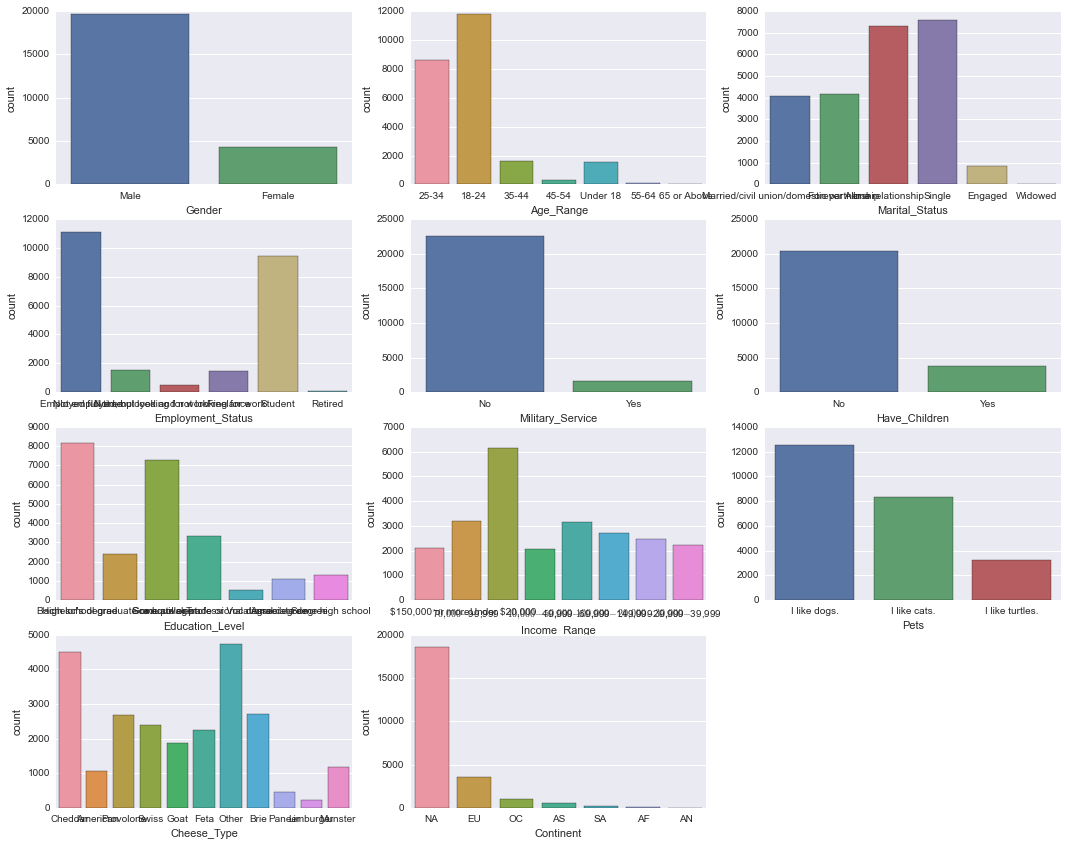

In [24]:
plt.figure(1)
plt.subplot(5,3,1)
sns.countplot(x="Gender", data=reddit_survey);
plt.subplot(5,3,2)
sns.countplot(x="Age_Range", data=reddit_survey);
plt.subplot(5,3,3)
sns.countplot(x="Marital_Status", data=reddit_survey);
plt.subplot(5,3,4)
sns.countplot(x="Employment_Status", data=reddit_survey);
plt.subplot(5,3,5)
sns.countplot(x="Military_Service", data=reddit_survey);
plt.subplot(5,3,6)
sns.countplot(x="Have_Children", data=reddit_survey);
plt.subplot(5,3,7)
sns.countplot(x="Education_Level", data=reddit_survey);
plt.subplot(5,3,8)
sns.countplot(x="Income_Range", data=reddit_survey);
plt.subplot(5,3,9)
sns.countplot(x="Pets", data=reddit_survey);
plt.subplot(5,3,10)
sns.countplot(x="Cheese_Type", data=reddit_survey);
plt.subplot(5,3,11)
sns.countplot(x="Continent", data=reddit_survey);

Some of the columns are heavely inbalanced, like Gender (most users are males), Age Range (most are young), Have Children (most don't), and Military Service, the target variable, and this could be problematic for the classification task

## Checking Variable Correlations

Creation of indicator variables

In [25]:
reddit_survey2 = pandas.get_dummies(data=reddit_survey)

In [26]:
reddit_survey2.head()

,Gender_Female,Gender_Male,Age_Range_18-24,Age_Range_25-34,Age_Range_35-44,Age_Range_45-54,Age_Range_55-64,Age_Range_65 or Above,Age_Range_Under 18,Marital_Status_Engaged,...,Cheese_Type_Paneer,Cheese_Type_Provolone,Cheese_Type_Swiss,Continent_AF,Continent_AN,Continent_AS,Continent_EU,Continent_NA,Continent_OC,Continent_SA
5,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
10,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


Computing the correlations of so many variables (1770) could take too much time. We'll remove the subreddit column before

In [30]:
reddit_survey2 = pandas.get_dummies(data=reddit_survey[['Gender', 'Age_Range', 'Marital_Status', 'Employment_Status', 'Military_Service', 'Have_Children', 'Education_Level', 'Income_Range', 'Pets', 'Cheese_Type', 'Continent']])

In [31]:
reddit_survey2.head()

,Gender_Female,Gender_Male,Age_Range_18-24,Age_Range_25-34,Age_Range_35-44,Age_Range_45-54,Age_Range_55-64,Age_Range_65 or Above,Age_Range_Under 18,Marital_Status_Engaged,...,Cheese_Type_Paneer,Cheese_Type_Provolone,Cheese_Type_Swiss,Continent_AF,Continent_AN,Continent_AS,Continent_EU,Continent_NA,Continent_OC,Continent_SA
5,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
10,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [32]:
correlations = reddit_survey2.corr()

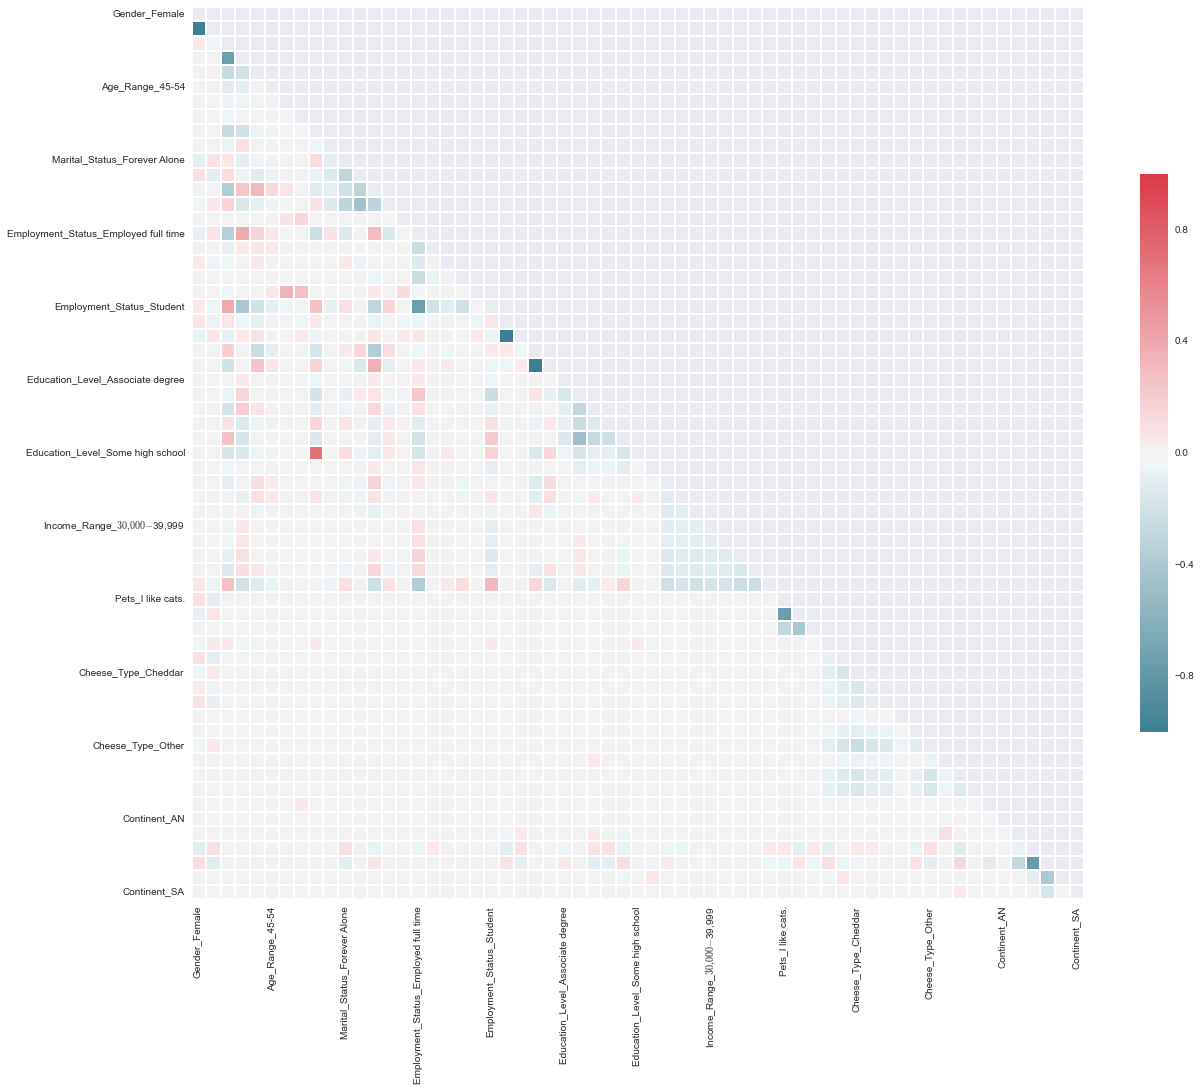

In [35]:
# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

We can search for the more highly correlated variables in the matrix

In [37]:
correlations.loc[:,:] = np.tril(correlations, k=-1)

In [38]:
correlations.stack().order()

Have_Children_Yes                                        Have_Children_No                                          -1.000000
Gender_Male                                              Gender_Female                                             -1.000000
Military_Service_Yes                                     Military_Service_No                                       -1.000000
Continent_NA                                             Continent_EU                                              -0.770999
Pets_I like dogs.                                        Pets_I like cats.                                         -0.756424
Employment_Status_Student                                Employment_Status_Employed full time                      -0.743872
Age_Range_25-34                                          Age_Range_18-24                                           -0.735227
Education_Level_Some college                             Education_Level_Bachelor's degree                         -0.472376


The more highly correlated distinct variables are:

#### Negative Correlations
- Employment_Status_Student with Age_Range_25-34
- Income_Range_Under $20,000 with Employment_Status_Employed full time
- Marital_Status_Married/civil union/domestic partnership with Age_Range_18-24
- Have_Children_No with Marital_Status_Married/civil union/domestic partnership
- Employment_Status_Employed full time with Age_Range_18-24

#### Positive Correlations
- Education_Level_Some high school with Age_Range_Under 18
- Employment_Status_Student with Age_Range_18-24
- Employment_Status_Employed full time with Age_Range_25-34
- Have_Children_Yes with Marital_Status_Married/civil union/domestic partnership
- Employment_Status_Retired with Age_Range_55-64

## Predicting Military Service

Create a random forest model that predicts Military Service based on the remaining variables. Use a grid search to optimize your model hyperparameters

In [39]:
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

The most important hyperparameter to optimize is the number of trees of the Forest

In [64]:
search = GridSearchCV(RandomForestClassifier(n_jobs=4), {'n_estimators': range(200, 1601, 200)})

Getting the target and the dataset, and separating a testing and training set

In [65]:
target = reddit_survey['Military_Service']
target = target == "Yes"
data = pandas.get_dummies(data=reddit_survey[['Gender', 'Age_Range', 'Marital_Status', 'Employment_Status', 'Have_Children', 'Education_Level', 'Income_Range', 'Pets', 'Cheese_Type', 'Continent']])
X_train, X_test, y_train, y_test = cross_validation.train_test_split(data, target, test_size=0.15)

Grid Search

In [66]:
search = search.fit(X_train, y_train)

Best parameters found by grid search: 

In [67]:
search.best_params_

{'n_estimators': 600}

Getting the best trained random forest

In [68]:
forest = search.best_estimator_

In [69]:
y_pred = forest.predict(X_test)

Computing the confussion matrix

In [70]:
print metrics.confusion_matrix(y_test, y_pred)

[[3315   39]
 [ 252    3]]


In [71]:
print metrics.classification_report(y_test, y_pred)

             precision    recall  f1-score   support

      False       0.93      0.99      0.96      3354
       True       0.07      0.01      0.02       255

avg / total       0.87      0.92      0.89      3609



Computing the model's AUC using 5 fold cross validation

In [72]:
cv_score = cross_validation.cross_val_score(forest, data, target2, scoring='roc_auc', cv=5)

In [73]:
cv_score.mean()

0.64102220002431742

0.64 is not too bad, but is not especially good

### Ploting the ROC curve

In [74]:
from sklearn.metrics import roc_curve

In [75]:
y_pred_prob = forest.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob)

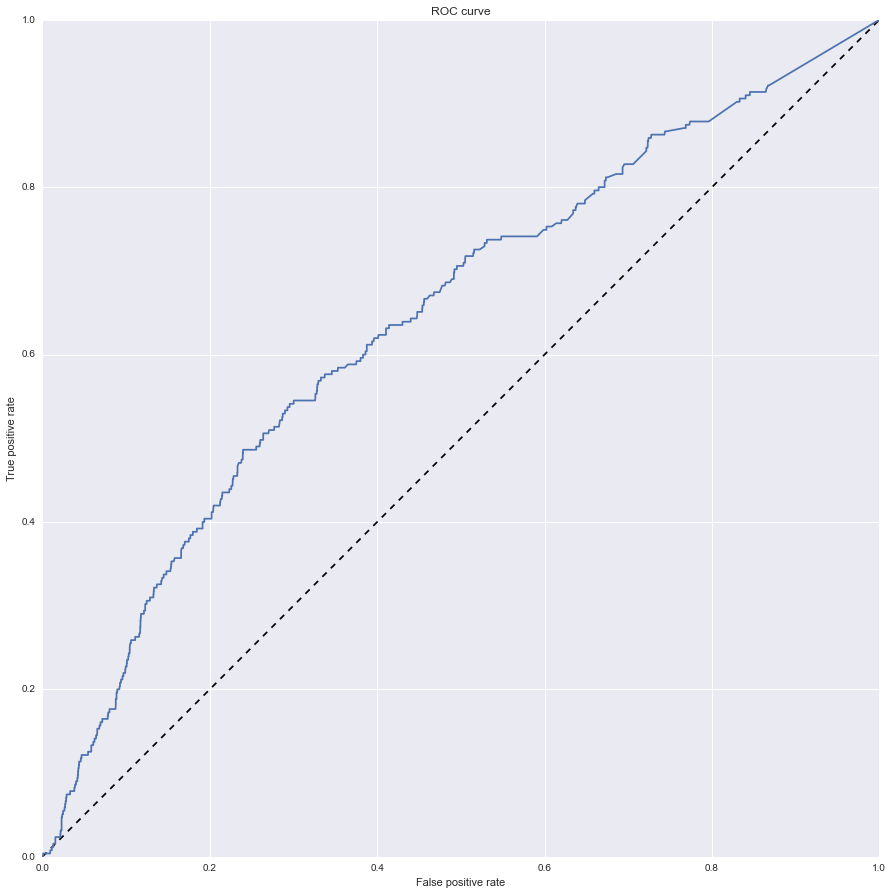

In [78]:
mpl.rcParams['figure.figsize'] = (15, 15)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()